In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data_read=pd.read_csv('vgsales.csv', delimiter = ',')

In [3]:
data_read.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
data_read.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [5]:
data_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
data_read.groupby('Genre')['Genre'].count()

Genre
Action          3316
Adventure       1286
Fighting         848
Misc            1739
Platform         886
Puzzle           582
Racing          1249
Role-Playing    1488
Shooter         1310
Simulation       867
Sports          2346
Strategy         681
Name: Genre, dtype: int64

In [7]:
genres = np.unique(data_read['Genre'])
genres

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder

gle = LabelEncoder()
genre_labels = gle.fit_transform(data_read['Genre'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
genre_mappings

{0: 'Action',
 1: 'Adventure',
 2: 'Fighting',
 3: 'Misc',
 4: 'Platform',
 5: 'Puzzle',
 6: 'Racing',
 7: 'Role-Playing',
 8: 'Shooter',
 9: 'Simulation',
 10: 'Sports',
 11: 'Strategy'}

In [9]:
data_read['GenreLabel'] = genre_labels
data_read[['Name', 'Platform', 'Year', 'Genre', 'GenreLabel']].iloc[1:7]

,Name,Platform,Year,Genre,GenreLabel
1,Super Mario Bros.,NES,1985.0,Platform,4
2,Mario Kart Wii,Wii,2008.0,Racing,6
3,Wii Sports Resort,Wii,2009.0,Sports,10
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,7
5,Tetris,GB,1989.0,Puzzle,5
6,New Super Mario Bros.,DS,2006.0,Platform,4


In [11]:
from sklearn.feature_extraction import FeatureHasher

fh = FeatureHasher(n_features=6, input_type='string')
hashed_features = fh.fit_transform(data_read['Genre'])
hashed_features = hashed_features.toarray()
pd.concat([data_read[['Name', 'Genre']], pd.DataFrame(hashed_features)], axis=1).iloc[1:7]

,Name,Genre,0,1,2,3,4,5
1,Super Mario Bros.,Platform,0.0,2.0,2.0,-1.0,1.0,0.0
2,Mario Kart Wii,Racing,-1.0,0.0,0.0,0.0,0.0,-1.0
3,Wii Sports Resort,Sports,-2.0,2.0,0.0,-2.0,0.0,0.0
4,Pokemon Red/Pokemon Blue,Role-Playing,-1.0,1.0,2.0,0.0,1.0,-1.0
5,Tetris,Puzzle,0.0,1.0,1.0,-2.0,1.0,-1.0
6,New Super Mario Bros.,Platform,0.0,2.0,2.0,-1.0,1.0,0.0


In [13]:
data_read.groupby('Year')['Year'].count()

Year
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     349
2001.0     482
2002.0     829
2003.0     775
2004.0     763
2005.0     941
2006.0    1008
2007.0    1202
2008.0    1428
2009.0    1431
2010.0    1259
2011.0    1139
2012.0     657
2013.0     546
2014.0     582
2015.0     614
2016.0     344
2017.0       3
2020.0       1
Name: Year, dtype: int64

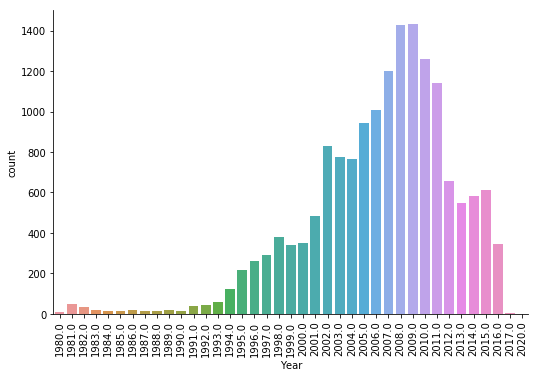

In [12]:
fg = sns.catplot('Year', data=data_read, kind='count', aspect=1.5)
fg.set_xlabels('Year')
fg.set_xticklabels(rotation=90)



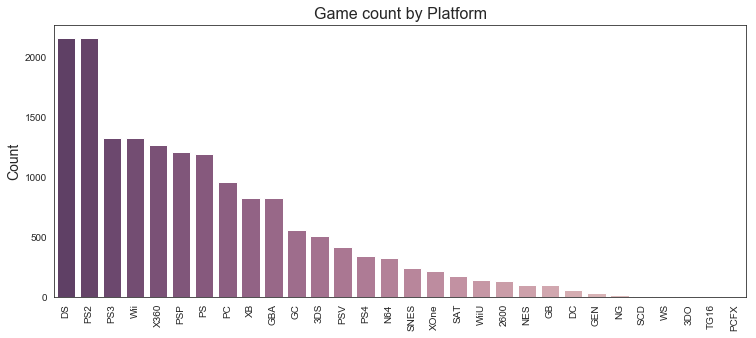

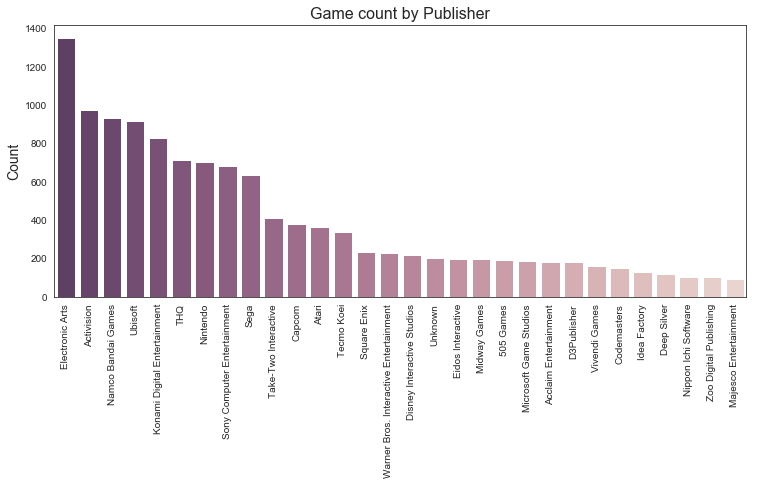

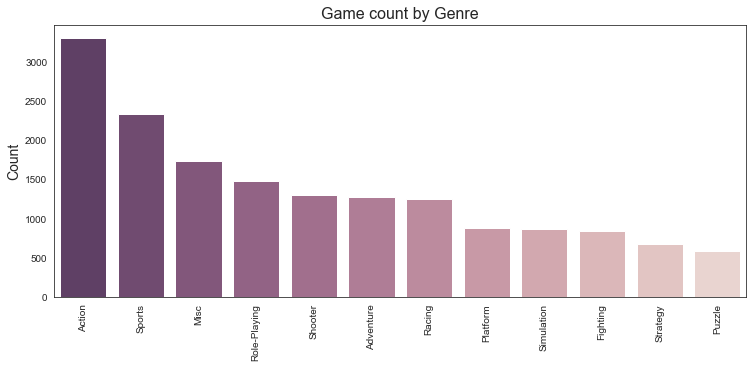

In [18]:
cols = ['Platform',  'Publisher', 'Genre']

for col in cols:
    chart = data_read[['Name', col]].groupby([col]).count().sort_values('Name', ascending=False).reset_index()
    sns.set_style("white")
    plt.figure(figsize=(12.4, 5))
    plt.xticks(rotation=90)
    sns.barplot(x=col, y='Name', data=chart[:30], palette=sns.cubehelix_palette((12 if col == 'Genre' else 30), dark=0.3, light=.85, reverse=True)).set_title(('Game count by '+col), fontsize=16)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('')

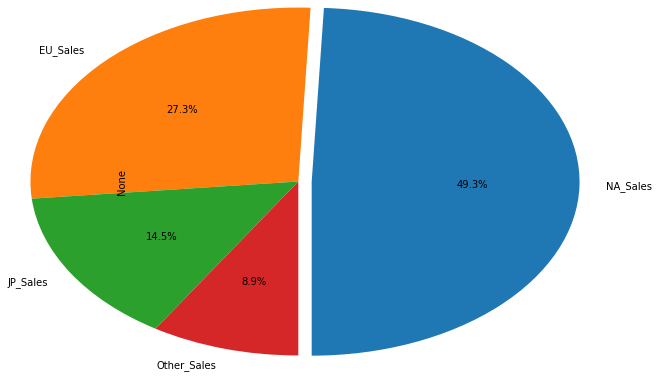

In [13]:
data_read[["NA_Sales", "EU_Sales","JP_Sales","Other_Sales"]].sum().plot(kind='pie', autopct="%1.1f%%", explode=(0.1,0,0,0), startangle=270, radius=2)

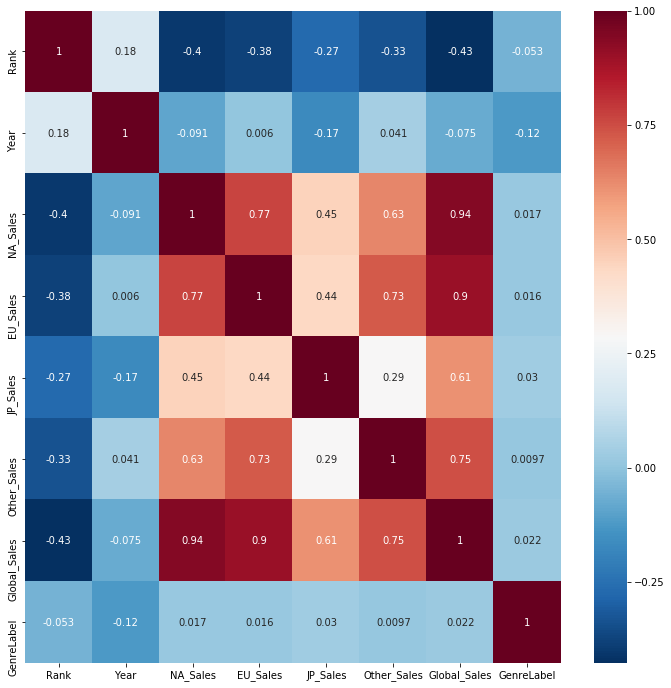

In [15]:
plt.figure(figsize=(12,12))
sns.heatmap(data_read.corr(),annot=True,cmap='RdBu_r')

Text(0.5,1,'Average sales over the course of years')

<Figure size 720x720 with 0 Axes>

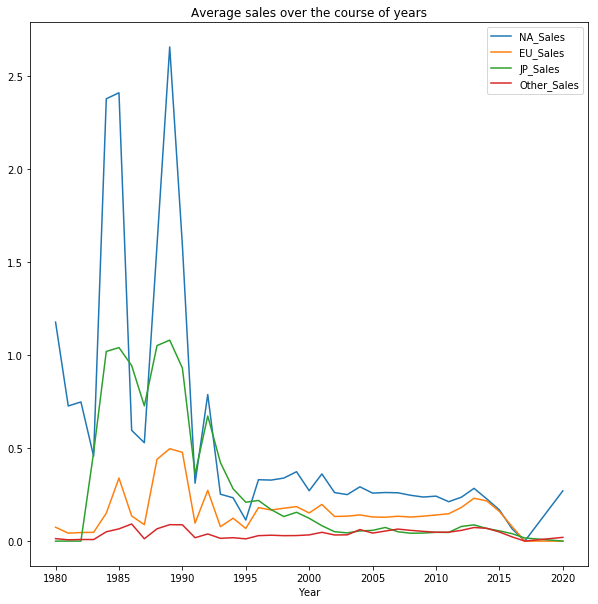

In [16]:
df1 = data_read.groupby(['Year'])
plt.figure(figsize=(10,10))
df1_mean = df1['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].aggregate(np.mean)
df1_mean.plot(figsize=(10,10))
plt.title('Average sales over the course of years')

Text(0.5,1,'Sales as per Genre')

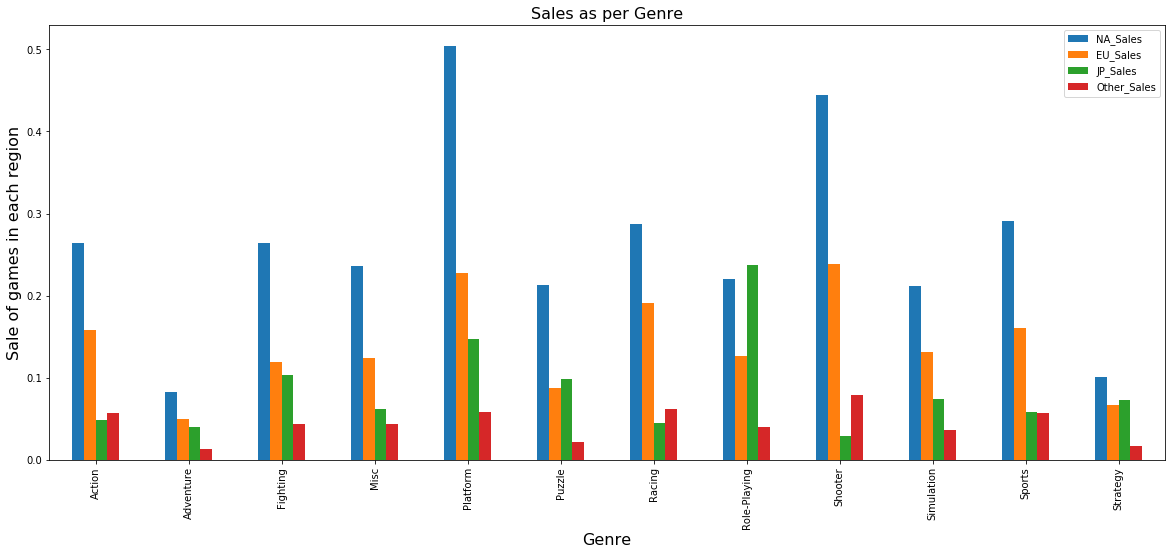

In [22]:
df3 = data_read.groupby(['Genre'])
val = df3['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].aggregate(np.mean)
val.plot(kind='bar',figsize=(20,8))
plt.xlabel('Genre',fontsize=16)
plt.ylabel('Sale of games in each region',fontsize=16)
plt.title('Sales as per Genre',fontsize=16)

Text(0.5,1,'Sales as per Platform')

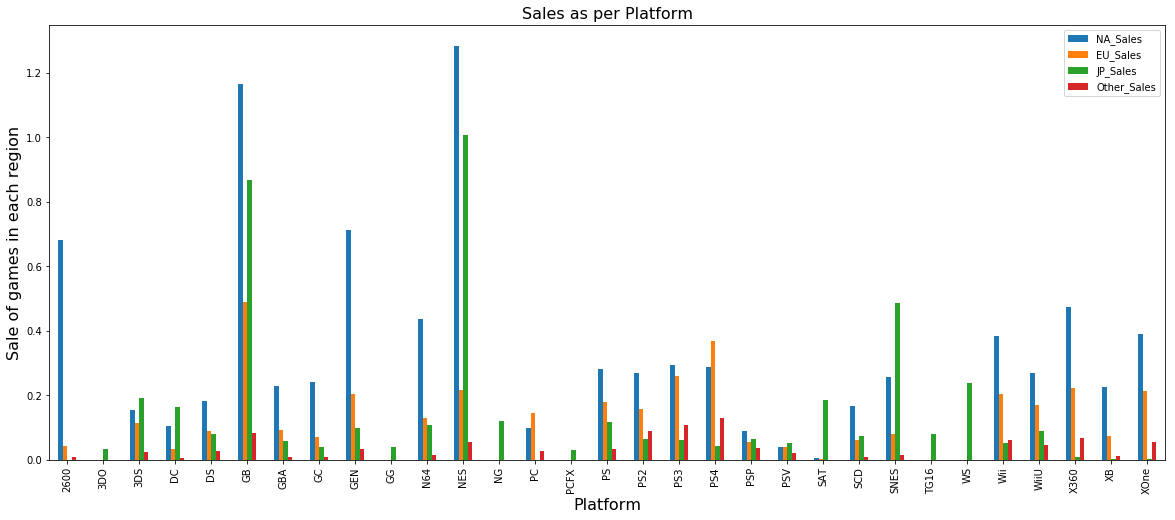

In [27]:
df4 = data_read.groupby(['Platform'])

val = df4['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].aggregate(np.mean)
val.plot(kind='bar',figsize=(20,8))
plt.xlabel('Platform',fontsize=16)
plt.ylabel('Sale of games in each region',fontsize=16)
plt.title('Sales as per Platform',fontsize=16)

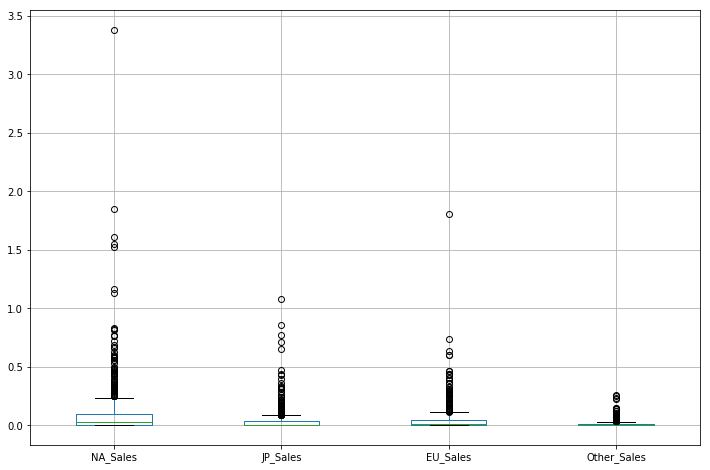

In [28]:
df_publishers = data_read.groupby('Publisher')
plot_publishers = df_publishers['NA_Sales','JP_Sales','EU_Sales','Other_Sales'].mean()
plt.figure(figsize=(12,8))
plot_publishers.boxplot()

Text(0,0.5,'Revenue')

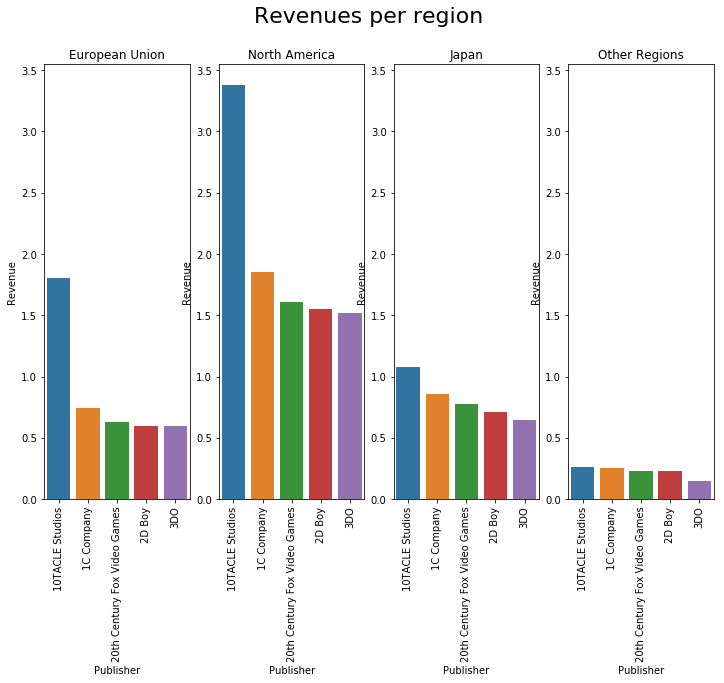

In [29]:
sort_publishers = plot_publishers.sort_values('EU_Sales',ascending=False)
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,4,1)
ax1.set_xticklabels(labels = 'European Union', rotation=90)
sns.barplot(x=plot_publishers.head(5).index, y=sort_publishers.head(5).EU_Sales)
plt.title('European Union')
plt.ylabel('Revenue')
plt.suptitle('Revenues per region',size=22)
sort_publishers = plot_publishers.sort_values('NA_Sales',ascending=False)
ax2 = fig.add_subplot(1,4,2,sharey=ax1)
ax2.set_xticklabels(labels = 'North America', rotation=90)
sns.barplot(x=plot_publishers.head(5).index, y=sort_publishers.head(5).NA_Sales)
plt.title('North America')
plt.ylabel('Revenue')
sort_publishers = plot_publishers.sort_values('JP_Sales',ascending=False)
ax3 = fig.add_subplot(1,4,3,sharey=ax1)
ax3.set_xticklabels(labels = 'Japan', rotation=90)
sns.barplot(x=plot_publishers.head(5).index, y=sort_publishers.head(5).JP_Sales)
plt.title('Japan')
plt.ylabel('Revenue')
sort_publishers = plot_publishers.sort_values('Other_Sales',ascending=False)
ax4 = fig.add_subplot(1,4,4,sharey=ax1)
ax4.set_xticklabels(labels = 'Japan', rotation=90)
sns.barplot(x=plot_publishers.head(5).index, y=sort_publishers.head(5).Other_Sales)
plt.title('Other Regions')
plt.ylabel('Revenue')